In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.fft as scf


def create_wave_and_dft(sf, duration, A, f, dur_with_zeropad=0, label=" "):
    """
    creates a sum of sinewave (without controlling phase) while allowing zeropadding.
    calculate and plots the normalized dft
    :param sf: float, sampling rate
    :param duration:  float, in seconds
    :param A: should be in the same size as f. a list of amplitudes
    :param f: a list of frequencies
    :param dur_with_zeropad: means that a total of (dur_with_zeropad-duration) zeros will be added
    :param label: string to be added for graph
    :return:
    """
    if (dur_with_zeropad < duration):  # in case of no zeropad
        dur_with_zeropad = int(sf * duration)
    t = np.arange(0, duration, 1 / sf)
    wave = 0 * t
    wave_zeropad = np.zeros(dur_with_zeropad)
    for i in range(len(A)):
        wave += A[i] * np.cos(2 * np.pi * f[i] * t)
    wave_zeropad[0:wave.size] = wave
    dft_normalize = scf.fft(wave_zeropad);
    freqs = np.fft.fftfreq(dft_normalize.size, t[1] - t[0])
    dft_normalize = dft_normalize[freqs > 0] / dft_normalize.size
    freqs = freqs[freqs > 0]

    plt.plot(freqs, dft_normalize, label=label)
    plt.legend()
    return (freqs, dft_normalize)

# 1 
## A

c:\python\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


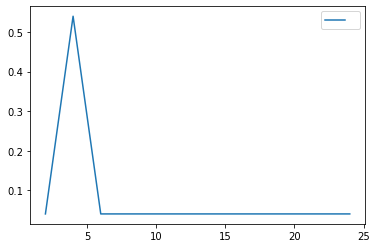

In [2]:
q1A = create_wave_and_dft(sf=50, duration=0.5, A=[1, 1], f=[4, 5])

#### i - frequency resolution is 2hz - jumping from 2 to 25(24 actually) in jumps of two. this is because we had 25 samples (12 positive)
#### ii - it has one peak, similar to what we would get for one cosine wave. The reason is that we don't have a lot of samples so we get one coefficient for the 4 and 4 hz waves together

## B

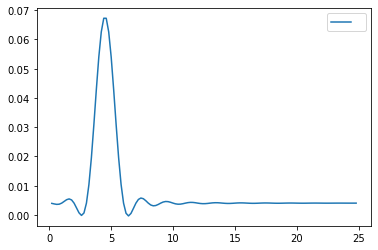

In [3]:
q1B = create_wave_and_dft(sf=50, duration=0.5, A=[1, 1], f=[4, 5], dur_with_zeropad=50 * 5)

#### i The coeffeicients resolution is bigger by a factor of 10 - 124 instead of 12. this is because we added more samples.
#### The problem was not solved, as we didn't really ad more information that allow us to disentangle 4hz from 5hz
#### ii what we actually did is to multiply the "full" signal of 5 seconds by a boxcar --> meaning we created a convolution of the actual fft with a sinc function in the frequency domain.

## C

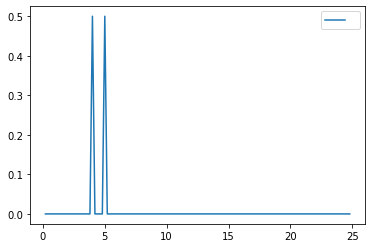

In [4]:
q1C = create_wave_and_dft(sf=50, duration=5, A=[1, 1], f=[4, 5])

#### we have more samples of actual signal, which improves the information we have. not multiplying the frequency domain by a boxcar saves us the ripples we had before

## D

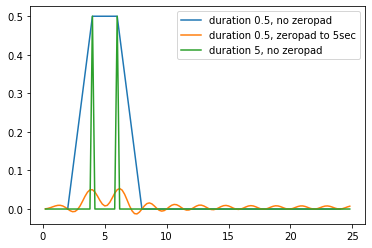

In [5]:
q1A = create_wave_and_dft(sf=50, duration=0.5, A=[1, 1], f=[4, 6], label="duration 0.5, no zeropad")
q1B = create_wave_and_dft(sf=50, duration=0.5, A=[1, 1], f=[4, 6], dur_with_zeropad=50 * 5,
                          label="duration 0.5, zeropad to 5sec")
q1C = create_wave_and_dft(sf=50, duration=5, A=[1, 1], f=[4, 6], label="duration 5, no zeropad")

#### We see that now the zeropadding harms the information we get by creating ripples
#### The original resolution of 2hz was enough to catch both frequencies but they were not isolated - the fft pointed towards equal power
#### along the band between 4-6, and extending the signal to 5 seconds revealed that they are actually distinct

## E
#### As the frequency resolution is 2hz, I expect that the fft will be inconclusive between 4 and 6 (there is no possible frequency of 5 in our scale),
#### so we expect part a will return someting similar to d - a wide trapeze over 4-6 (post moetem: actually i was wrong...)

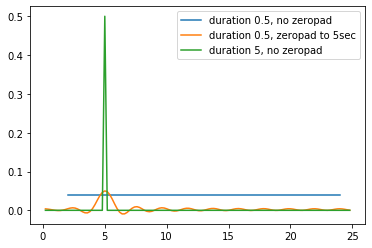

In [6]:
q1A = create_wave_and_dft(sf=50, duration=0.5, A=[1], f=[5], label="duration 0.5, no zeropad")
q1B = create_wave_and_dft(sf=50, duration=0.5, A=[1], f=[5], dur_with_zeropad=50 * 5,
                          label="duration 0.5, zeropad to 5sec")
q1C = create_wave_and_dft(sf=50, duration=5, A=[1], f=[5], label="duration 5, no zeropad")

#### Apparently because 5 hz fell outside the resolution,
#### the dot product of both 4 and 6hz sinewaves with our wave resulted in the same normalizred power as all other frequencies.
#### so in this case - zeropadding did help because it increased the resolution (or convolved a constant value with a sinc)
